## Problema de Negócio

Trabalhamos  como  analistas  em  uma  empresa  que  comercializa  produtos  importados  dos  mais variados tipos para diversos países ao redor do mundo. Nosso trabalho é calcular, analisar e interpretar 8 indicadores chave de performance com base nos dados fornecidos. Os dados são fictícios, mas representam valores que podem ser considerados reais.

Os  indicadores  foram  definidos  pela  área  de  planejamento  estratégico  da  empresa  que  precisa acompanhar a evolução das vendas e a efetividade das campanhas de Marketing aolongo do tempo!Aqui estão os 8 indicadores que farão parte da nossa análise:

•Indicador 1 –FaturamentoMensal

•Indicador2 -Taxa Percentual de Crescimento Mensal

•Indicador 3 -ClientesAtivos Por Mês em um País (Brasil)

•Indicador 4 -Total de Itens Comprados Por Mês em um País (Brasil)

•Indicador 5 -Faturamento Médio Mensalem um País (Brasil)

•Indicador 6 -Diferença de Faturamento ao Longo do Tempo Entre Clientes Novos e Antigos

•Indicador 7 -Taxa de Novos Clientes

•Indicador 8 -Taxa Mensal de Retenção de Clientes

In [1]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Carregando os dados
data = pd.read_csv("dataset.csv",header = 0, encoding = 'unicode_escape')

In [3]:
data.head()

,NumeroFatura,CodigoProduto,NomeProduto,Quantidade,DataVenda,ValorUnitario,IdCliente,Pais
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,Brasil
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,Brasil
2,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,Brasil
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,Brasil
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,Brasil


In [4]:
#Verificando a quantidade de dados
data.shape

(541800, 8)

In [5]:
#Verificando os tipos de dados
data.dtypes

NumeroFatura      object
CodigoProduto     object
NomeProduto       object
Quantidade         int64
DataVenda         object
ValorUnitario    float64
IdCliente        float64
Pais              object
dtype: object

In [6]:
#Verificando se há valores Nan
data.isnull().sum()

NumeroFatura          0
CodigoProduto         0
NomeProduto        1454
Quantidade            0
DataVenda             0
ValorUnitario         0
IdCliente        135075
Pais                  0
dtype: int64

In [7]:
#Verificando a porcentagem de valores Nan do IdCliente
porc_id = (data['IdCliente'].isnull().sum()/len(data['IdCliente']))*100
porc_id

24.93078626799557

In [8]:
#Substituir o id nan por 00000
data['IdCliente'] = data['IdCliente'].fillna(0000)

In [9]:
data.dtypes

NumeroFatura      object
CodigoProduto     object
NomeProduto       object
Quantidade         int64
DataVenda         object
ValorUnitario    float64
IdCliente        float64
Pais              object
dtype: object

In [10]:
#Substituit Nan do nome do produto por Desconhecido
data['NomeProduto'] = data['NomeProduto'].fillna("desconhecido")

In [11]:
data.isnull().sum()

NumeroFatura     0
CodigoProduto    0
NomeProduto      0
Quantidade       0
DataVenda        0
ValorUnitario    0
IdCliente        0
Pais             0
dtype: int64

In [12]:
data['DataVenda']

0          12/1/2010 8:26
1          12/1/2010 8:26
2          12/1/2010 8:26
3          12/1/2010 8:26
4          12/1/2010 8:26
               ...       
541795    12/9/2011 12:50
541796    12/9/2011 12:50
541797    12/9/2011 12:50
541798    12/9/2011 12:50
541799    12/9/2011 12:50
Name: DataVenda, Length: 541800, dtype: object

In [13]:
#Transformar a coluna DataVenda em Datetime
data['DataVenda'] = pd.to_datetime(data['DataVenda'], format= '%m/%d/%Y %H:%M')

In [14]:
data.dtypes

NumeroFatura             object
CodigoProduto            object
NomeProduto              object
Quantidade                int64
DataVenda        datetime64[ns]
ValorUnitario           float64
IdCliente               float64
Pais                     object
dtype: object

In [15]:
data['dia'] = data['DataVenda'].dt.day
data['mes'] = data['DataVenda'].dt.month
data['ano'] = data['DataVenda'].dt.year

In [16]:
data.head()

,NumeroFatura,CodigoProduto,NomeProduto,Quantidade,DataVenda,ValorUnitario,IdCliente,Pais,dia,mes,ano
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,Brasil,1,12,2010
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,Brasil,1,12,2010
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,Brasil,1,12,2010
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,Brasil,1,12,2010
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,Brasil,1,12,2010


In [17]:
#Como o nome do produto e o codigo possuem a mesma informação, tiramo o nome. 
#Retiramos também a coluna DataVenda
data.drop(columns = ['NomeProduto', 'DataVenda'],axis=1, inplace=True)

In [18]:
data['Total'] = data.apply(lambda row: (row['Quantidade']*row['ValorUnitario']), axis=1)

In [19]:
data.head()

,NumeroFatura,CodigoProduto,Quantidade,ValorUnitario,IdCliente,Pais,dia,mes,ano,Total
0,536365,21730,6,4.25,17850.0,Brasil,1,12,2010,25.50
1,536365,85123A,6,2.55,17850.0,Brasil,1,12,2010,15.30
2,536365,71053,6,3.39,17850.0,Brasil,1,12,2010,20.34
3,536365,84406B,8,2.75,17850.0,Brasil,1,12,2010,22.00
4,536365,84029G,6,3.39,17850.0,Brasil,1,12,2010,20.34


In [20]:
data['ano'].value_counts()

2011    499319
2010     42481
Name: ano, dtype: int64

## Faturamento Mensal

In [21]:
grupo_ano = data.groupby(['ano','mes'])
fat_mensal = grupo_ano.sum()

In [22]:
fat_mensal.head()

Quantidade  ValorUnitario    IdCliente     dia       Total
ano  mes                                                            
2010 12       342228     260520.850  416697748.0  431515  748957.020
2011 1        308966     172752.800  331919771.0  584619  560000.260
     2        277989     127448.770  311780860.0  410815  498062.650
     3        351872     171486.510  422329758.0  625389  683267.080
     4        289098     129164.961  354119428.0  430030  493207.121

In [23]:
fat_mensal = fat_mensal.reset_index()


In [24]:
fat_mensal.dtypes

ano                int64
mes                int64
Quantidade         int64
ValorUnitario    float64
IdCliente        float64
dia                int64
Total            float64
dtype: object

In [25]:
fat_2011 = fat_mensal.drop(0)

In [26]:
fat_2011

,ano,mes,Quantidade,ValorUnitario,IdCliente,dia,Total
1,2011,1,308966,172752.800,3.319198e+08,584619,560000.260
2,2011,2,277989,127448.770,3.117809e+08,410815,498062.650
3,2011,3,351872,171486.510,4.223298e+08,625389,683267.080
4,2011,4,289098,129164.961,3.541194e+08,430030,493207.121
5,2011,5,380391,190685.460,4.400088e+08,562670,723333.510
6,2011,6,341623,200717.340,4.264710e+08,557776,691123.120
7,2011,7,391116,171906.791,4.209226e+08,621288,681300.111
8,2011,8,406199,150385.680,4.219478e+08,565729,682680.510
9,2011,9,549817,199235.212,6.229373e+08,842775,1019687.622
10,2011,10,570532,263434.090,7.727017e+08,996882,1070704.670


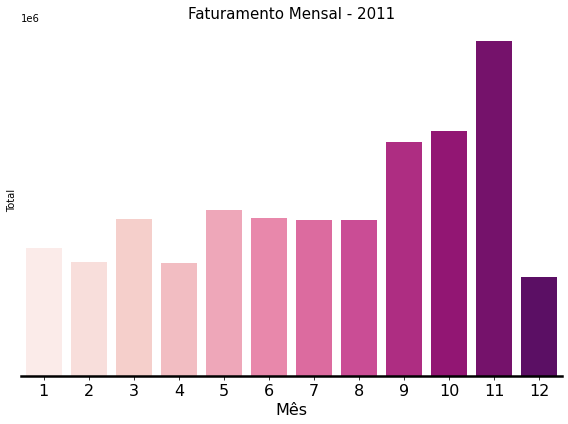

In [27]:
#altura = []
#for i in fat_2011['Total']:
#   altura.append(i)
#posicao = []
#for i in range(0,13,1): 
#   posicao.append(i)



#criando uma figure, axes, alterando tamanho
fig, ax = plt.subplots(figsize=(8,6))
#criando o gráfico de barras
sns.barplot(x='mes', y='Total', data=fat_2011, ax=ax,  palette='RdPu')
#adicionando título
ax.set_title("Faturamento Mensal - 2011", fontdict={'fontsize':15})
#mudando e nome e tamanho do label x
ax.set_xlabel('Mês', fontdict={'fontsize':16})
#mudando tamanho do label eixo y
ax.set_ylabel('Total')
#mudando tamanho dos labels dos ticks
ax.tick_params(labelsize=16)
#aumentando espessura linha inferior
ax.spines['bottom'].set_linewidth(2.5)
#remoção dos outros três axis
for axis in ['top', 'right', 'left']:
   ax.spines[axis].set_color(None)
#remoção dos ticks
ax.tick_params(axis='y', labelleft=False, left=None)                  

    
fig.tight_layout();

## Indicador2 -Taxa Percentual de Crescimento Mensal

In [28]:
fat_2011.dtypes

ano                int64
mes                int64
Quantidade         int64
ValorUnitario    float64
IdCliente        float64
dia                int64
Total            float64
dtype: object

In [29]:
#Taxa Percentual de Crescimento Mensal = Faturamento Mensal / Faturamento Mensal Anterior * 100
fat_mensal['Crescimento_mensal'] = fat_mensal['Total'].pct_change()    

In [30]:
cresc = fat_mensal.drop(0)
cresc.head()

,ano,mes,Quantidade,ValorUnitario,IdCliente,dia,Total,Crescimento_mensal
1,2011,1,308966,172752.800,331919771.0,584619,560000.260,-0.252293
2,2011,2,277989,127448.770,311780860.0,410815,498062.650,-0.110603
3,2011,3,351872,171486.510,422329758.0,625389,683267.080,0.371850
4,2011,4,289098,129164.961,354119428.0,430030,493207.121,-0.278163
5,2011,5,380391,190685.460,440008786.0,562670,723333.510,0.466592


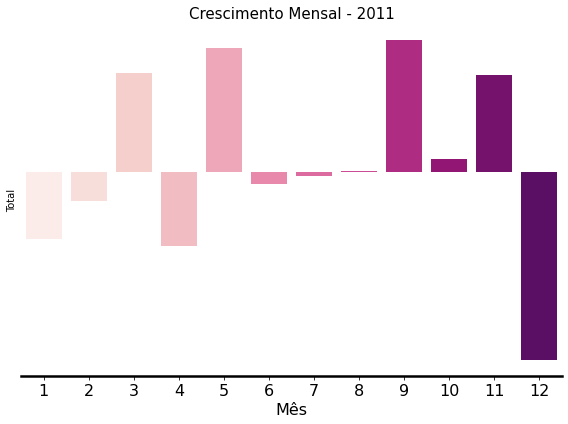

In [31]:
#criando uma figure, axes, alterando tamanho
fig, ax = plt.subplots(figsize=(8,6))
#criando o gráfico de barras
sns.barplot(x='mes', y='Crescimento_mensal', data=cresc, ax=ax,  palette='RdPu')
#adicionando título
ax.set_title("Crescimento Mensal - 2011", fontdict={'fontsize':15})
#mudando e nome e tamanho do label x
ax.set_xlabel('Mês', fontdict={'fontsize':16})
#mudando tamanho do label eixo y
ax.set_ylabel('Total')
#mudando tamanho dos labels dos ticks
ax.tick_params(labelsize=16)
#aumentando espessura linha inferior
ax.spines['bottom'].set_linewidth(2.5)
#remoção dos outros três axis
for axis in ['top', 'right', 'left']:
   ax.spines[axis].set_color(None)
#remoção dos ticks
ax.tick_params(axis='y', labelleft=False, left=None)                  

fig.tight_layout();

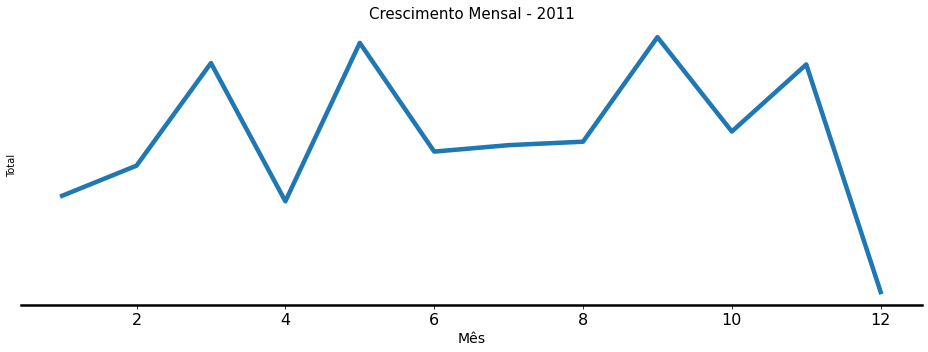

In [32]:
#criando uma figure, axes, alterando tamanho
fig, ax = plt.subplots(figsize=(8,6))
#criando o gráfico de barras
sns.lineplot(x='mes', y='Crescimento_mensal', data=cresc, ax=ax, linewidth = 4.5,  palette='RdPu')
#adicionando título
ax.set_title("Crescimento Mensal - 2011", fontdict={'fontsize':15})
#mudando e nome e tamanho do label x
ax.set_xlabel('Mês', fontdict={'fontsize':14})
#mudando tamanho do label eixo y
ax.set_ylabel('Total')
#mudando tamanho dos labels dos ticks
ax.tick_params(labelsize=16)
#aumentando espessura linha inferior
ax.spines['bottom'].set_linewidth(2.5)
#remoção dos outros três axis
for axis in ['top', 'right', 'left']:
   ax.spines[axis].set_color(None)
#remoção dos ticks
ax.tick_params(axis='y', labelleft=False, left=None)  

    
fig.set_figheight(5)
fig.set_figwidth(13)

fig.tight_layout();

## Indicador 3 -ClientesAtivos Por Mês em um País (Brasil)

In [33]:
data['Pais'].value_counts()

Brasil             495385
Alemanha             9480
Uruguai              8556
Irlanda              8196
Espanha              4535
Holanda              2371
Belgium              2069
Portugal             1519
Australia            1259
Noruega              1086
Italy                 803
Channel Islands       758
Finland               695
Cyprus                622
Sweden                462
China                 446
Austria               401
Dinamarca             389
Japan                 358
Poland                341
Israel                297
USA                   291
Hong Kong             288
Cingapura             229
Iceland               182
Canada                151
Greece                146
Malta                 127
Equador                68
Chile                  61
Paraguai               58
Iraque                 45
Lithuania              35
Inglaterra             32
Czech Republic         30
Bahrain                19
Saudi Arabia           10
Name: Pais, dtype: int64

In [34]:
data_br = data[data['Pais']== 'Brasil']

In [35]:
data_br.shape

(495385, 10)

In [36]:
clientes = data_br[['IdCliente', 'mes']]

In [37]:
clientes.shape

(495385, 2)

In [38]:
clientes_unic = clientes.drop_duplicates()

In [39]:
clientes_unic.head()

,IdCliente,mes
0,17850.0,12
9,13047.0,12
46,13748.0,12
65,15100.0,12
82,15291.0,12


In [40]:
clientes_unic = clientes_unic.drop(0)

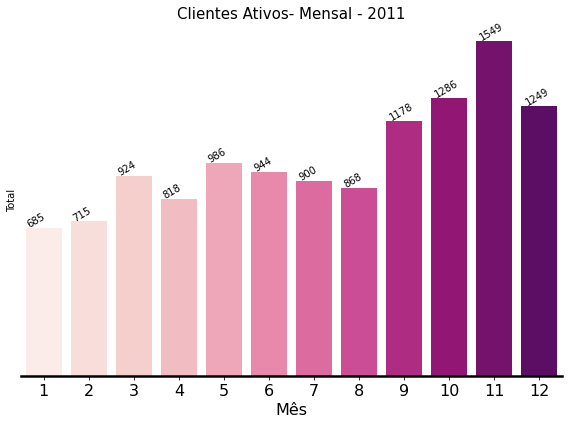

In [59]:


#criando uma figure, axes, alterando tamanho
fig, ax = plt.subplots(figsize=(8,6))
#criando o gráfico de barras
sns.countplot(x='mes', data=clientes_unic, ax=ax,  palette='RdPu')
#adicionando título
ax.set_title("Clientes Ativos- Mensal - 2011", fontdict={'fontsize':15})
#mudando e nome e tamanho do label x
ax.set_xlabel('Mês', fontdict={'fontsize':16})
#mudando tamanho do label eixo y
ax.set_ylabel('Total')
#mudando tamanho dos labels dos ticks
ax.tick_params(labelsize=16)
#aumentando espessura linha inferior
ax.spines['bottom'].set_linewidth(2.5)
#remoção dos outros três axis
for axis in ['top', 'right', 'left']:
    ax.spines[axis].set_color(None)
#remoção dos ticks
ax.tick_params(axis='y', labelleft=False, left=None) 

#Colocando valores
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation = 30)

#otimizar espaço da figure
fig.tight_layout();

## Indicador 4 -Total de Itens Comprados Por Mês em um País (Brasil)

In [42]:
data_br = data_br.drop(0)

In [43]:
itens =  data_br.groupby('mes')['Quantidade'].sum().reset_index()

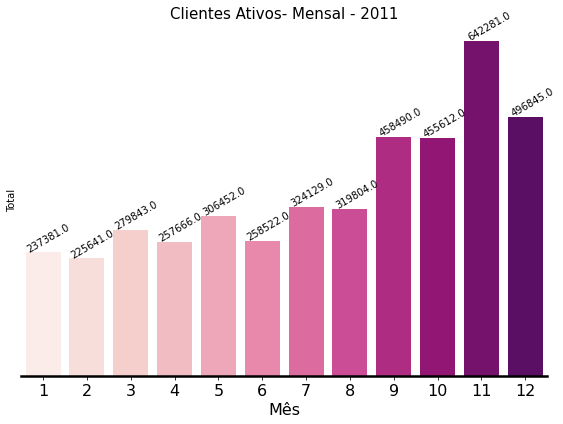

In [58]:

#criando uma figure, axes, alterando tamanho
fig, ax = plt.subplots(figsize=(8,6))
#criando o gráfico de barras
sns.barplot(x='mes', y='Quantidade', data=itens, ax=ax,  palette='RdPu')
#adicionando título
ax.set_title("Clientes Ativos- Mensal - 2011", fontdict={'fontsize':15})
#mudando e nome e tamanho do label x
ax.set_xlabel('Mês', fontdict={'fontsize':16})
#mudando tamanho do label eixo y
ax.set_ylabel('Total')
#mudando tamanho dos labels dos ticks
ax.tick_params(labelsize=16)
#aumentando espessura linha inferior
ax.spines['bottom'].set_linewidth(2.5)
#remoção dos outros três axis
for axis in ['top', 'right', 'left']:
    ax.spines[axis].set_color(None)
#remoção dos ticks
ax.tick_params(axis='y', labelleft=False, left=None) 

#Colocando valores
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation = 30)

#otimizar espaço da figure
fig.tight_layout();

## Indicador 5 -Faturamento Médio Mensal em um País (Brasil)

In [46]:
data.head()

,NumeroFatura,CodigoProduto,Quantidade,ValorUnitario,IdCliente,Pais,dia,mes,ano,Total
0,536365,21730,6,4.25,17850.0,Brasil,1,12,2010,25.50
1,536365,85123A,6,2.55,17850.0,Brasil,1,12,2010,15.30
2,536365,71053,6,3.39,17850.0,Brasil,1,12,2010,20.34
3,536365,84406B,8,2.75,17850.0,Brasil,1,12,2010,22.00
4,536365,84029G,6,3.39,17850.0,Brasil,1,12,2010,20.34


In [47]:
data_fat = data[data['Pais']== 'Brasil']

In [48]:
data_fat.head()

,NumeroFatura,CodigoProduto,Quantidade,ValorUnitario,IdCliente,Pais,dia,mes,ano,Total
0,536365,21730,6,4.25,17850.0,Brasil,1,12,2010,25.50
1,536365,85123A,6,2.55,17850.0,Brasil,1,12,2010,15.30
2,536365,71053,6,3.39,17850.0,Brasil,1,12,2010,20.34
3,536365,84406B,8,2.75,17850.0,Brasil,1,12,2010,22.00
4,536365,84029G,6,3.39,17850.0,Brasil,1,12,2010,20.34


In [49]:
data_fat = data_fat.drop(0)

In [50]:
fat =  data_fat.groupby('mes')['Total'].mean().reset_index()

In [52]:
fat.head()

,mes,Total
0,1,13.614680
1,2,16.093027
2,3,16.716166
3,4,15.773380
4,5,17.713823


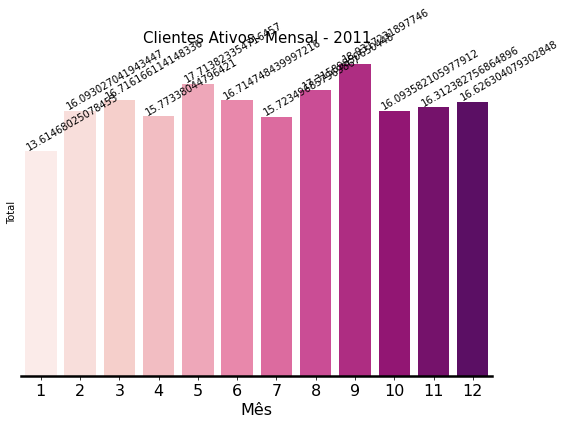

In [57]:
#criando uma figure, axes, alterando tamanho
fig, ax = plt.subplots(figsize=(8,6))
#criando o gráfico de barras
sns.barplot(x='mes', y='Total', data=fat, ax=ax,  palette='RdPu')
#adicionando título
ax.set_title("Clientes Ativos- Mensal - 2011", fontdict={'fontsize':15})
#mudando e nome e tamanho do label x
ax.set_xlabel('Mês', fontdict={'fontsize':16})
#mudando tamanho do label eixo y
ax.set_ylabel('Total')
#mudando tamanho dos labels dos ticks
ax.tick_params(labelsize=16)
#aumentando espessura linha inferior
ax.spines['bottom'].set_linewidth(2.5)
#remoção dos outros três axis
for axis in ['top', 'right', 'left']:
    ax.spines[axis].set_color(None)
#remoção dos ticks
ax.tick_params(axis='y', labelleft=False, left=None) 



#Colocando valores
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation = 30)

#otimizar espaço da figure
fig.tight_layout();

## Indicador 6 -Diferença de Faturamento ao Longo do Tempo Entre Clientes Novos e Antigos